# Definição do problema

- Base de dados:
  - Input (X): Temperatura
  - Output (Y): Lucro diário em dólares

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

TensorFlow 2.x selected.


'2.1.0-rc1'

# Etapa 2: Importação da base de dados

In [ ]:
sales_df = pd.read_csv('SalesData.csv')

In [ ]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da base de dados

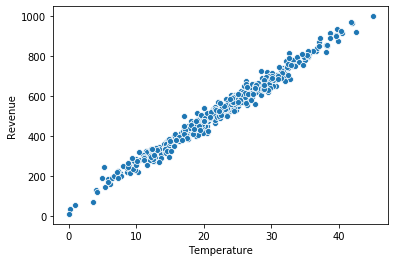

In [ ]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue']);

# Etapa 4: Criação das variáveis da base de dados

In [ ]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [ ]:
X_train.shape

(500,)

In [ ]:
y_train.shape

(500,)

# Etapa 5: Criação e construção do modelo

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Train on 500 samples
Epoch 1/1000
500/500 [==============================] - 0s 454us/sample - loss: 717.4647
Epoch 2/1000
500/500 [==============================] - 0s 73us/sample - loss: 663.4061
Epoch 3/1000
500/500 [==============================] - 0s 71us/sample - loss: 672.7076
Epoch 4/1000
500/500 [==============================] - 0s 69us/sample - loss: 642.5907
Epoch 5/1000
500/500 [==============================] - 0s 74us/sample - loss: 643.8630
Epoch 6/1000
500/500 [==============================] - 0s 65us/sample - loss: 632.2991
Epoch 7/1000
500/500 [==============================] - 0s 68us/sample - loss: 641.3046
Epoch 8/1000
500/500 [==============================] - 0s 65us/sample - loss: 657.6142
Epoch 9/1000
500/500 [==============================] - 0s 68us/sample - loss: 739.5189
Epoch 10/1000
500/500 [==============================] - 0s 66us/sample - loss: 666.4572
Epoch 11/1000
500/500 [==============================] - 0s 65us/sample - loss: 634.8156
Epoch 12

# Etapa 6: Avaliação do modelo

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

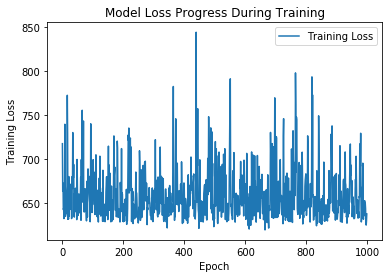

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [ ]:
model.get_weights()

[array([[-1.7877847e-02, -1.1870530e-02,  6.3725114e-03, -2.2623751e-03,
         -6.1257575e-02,  5.8165435e-03,  4.5891466e+00,  5.0820159e-03,
         -1.8934093e-02,  9.1017177e-03]], dtype=float32),
 array([ 0.33577672,  0.22247449, -0.11805892,  0.041088  ,  1.137074  ,
        -0.10658467,  4.421164  , -0.09880944,  0.34835088, -0.17856981],
       dtype=float32),
 array([[ 4.7225212e-03],
        [ 3.6755677e-03],
        [-1.8386067e-03],
        [ 7.4179866e-04],
        [ 1.6014479e-02],
        [-1.6038278e-03],
        [ 4.5724812e+00],
        [-1.9456600e-03],
        [ 5.4861130e-03],
        [-3.3808707e-03]], dtype=float32),
 array([24.406118], dtype=float32)]

In [ ]:
# Previsões com o modelo treinado
temp = 5
revenue = model.predict([temp])
print('Revenue Predictions Using Trained ANN =', revenue)

Revenue Predictions Using Trained ANN = [[149.55809]]


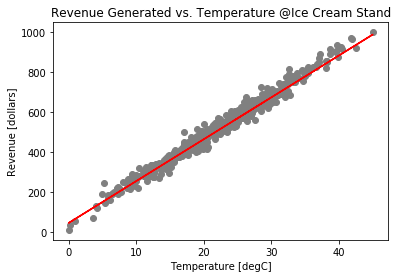

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

# Etapa 7: Confirmar os resultados usando sklearn

In [ ]:
X_train.shape

(500,)

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
X_train.shape

(500, 1)

In [ ]:
y_train = y_train.values.reshape(-1,1)

In [ ]:
y_train.shape

(500, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.coef_

array([[21.44362551]])

In [ ]:
regressor.intercept_

array([44.83126709])

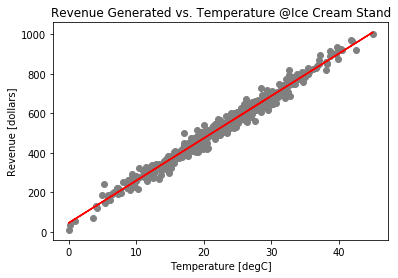

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

In [ ]:
temp = 5
revenue = regressor.predict([[temp]])
print('Revenue Predictions Using Trained ANN =', revenue)

Revenue Predictions Using Trained ANN = [[152.04939464]]
